# New Questions To Answer

#### 1. Create a new column called: “dormitory_type”
    • If the value of the “bedrooms” column is equal to 1 => ‘studio’
    • If the value of the “bedrooms” column is equal to 2 => ‘apartment’
    • If the “bedrooms” column value is greater than 2 => ‘house’
#### 2. Draw a bar chart that represents the sum of the prices by the number of rooms.
#### 3. Draw a line graph that represents the average prices for the year of construction of the properties.
#### 4. Draw a bar graph that represents the average price by type of dorms.
#### 5. Draw a line graph that shows the evolution of the average prices for the year of renovation of the properties, from the year 1930.
#### 6. Make a table showing the average prices by year of construction and type of dorms of real estate.
#### 7. Create a Dashboard with the graphs for questions 02, 03, 04 ( Dashboard: 1 Row and 2 Columns)
#### 8. Create a Dashboard with the graphs of questions 02, 04 (Dashboard: 2 columns)
#### 9. Create a Dashboard with the graphs of questions 03, 05 ( Dashboard: 2 Lines )
#### 10. Make a graph with the size of the dots being equal to the size of the living room

## Import Libraries

In [1]:
import numpy          as np
import pandas         as pd
import seaborn        as sns
import plotly.express as px

from matplotlib           import gridspec
from matplotlib           import pyplot as plt
from IPython.core.display import HTML



In [2]:
# Function for format all over the graphics
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [14, 7]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading data

In [3]:
data = pd.read_csv('datasets/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Answers to Questions

## 1. Create a new column called: “dormitory_type”
    • If the value of the “bedrooms” column is equal to 1 => ‘studio’
    • If the value of the “bedrooms” column is equal to 2 => ‘apartment’
    • If the “bedrooms” column value is greater than 2 => ‘house’

In [4]:
# Creating new cloumn "dormitory_type" and attribuiting values to new column whit .apply comand.
data['dormitory_type'] = data['bedrooms'].apply(lambda x:   'studio' if x == 1 else
                                                            'apartment' if x == 2 else 
                                                            'house' if x > 2 else 'NA')
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartment


## 2. Draw a bar chart that represents the sum of the prices by the number of rooms.


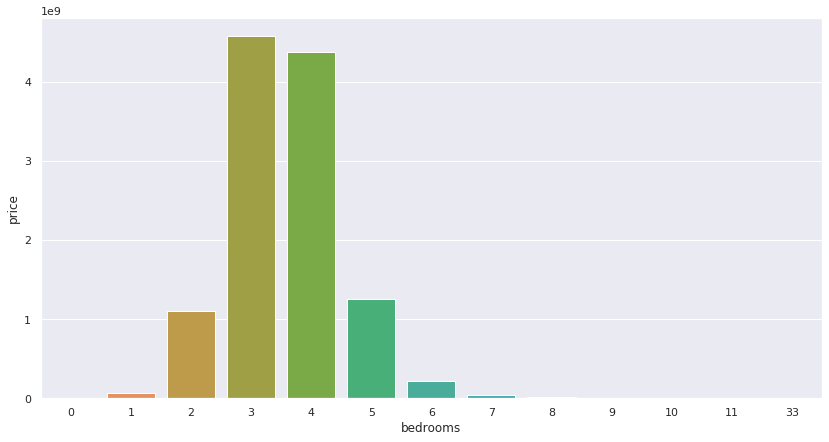

In [5]:
# Filtering the columns we want to plot on the chart.
df = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot(x='bedrooms', y='price', data=df); # Use ";" at the end, hide default texts indifferent to plotting.

## 3. Draw a line graph that represents the average prices for the year of construction of the properties.


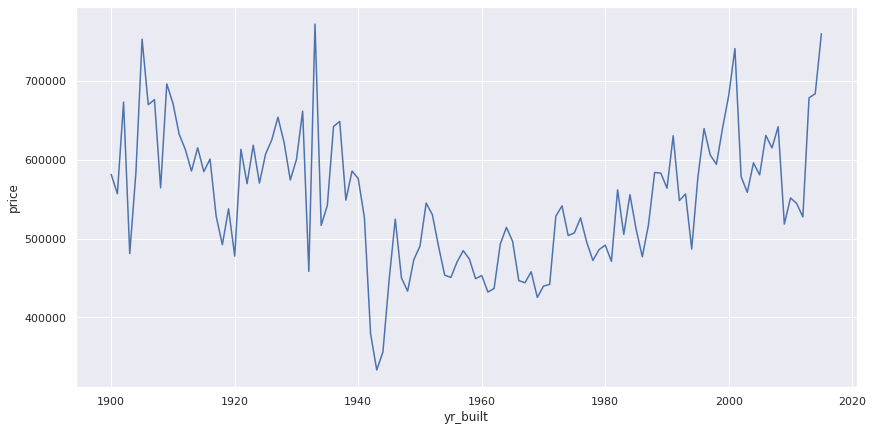

In [6]:
#plt.figure(figsize=(24, 7)) # Define the size of the graphic.
df1 = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(x='yr_built', y='price', data=df1);

## 4. Draw a bar graph that represents the average price by type of dorms.


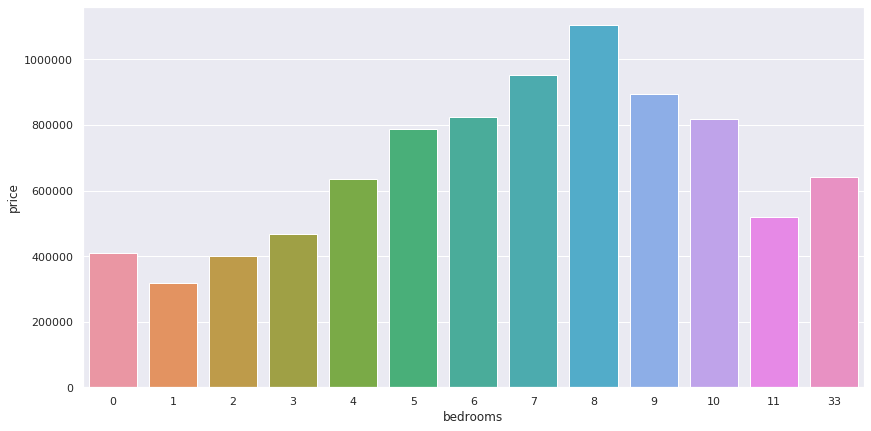

In [7]:
df2 = data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
#plt.bar(df2['bedrooms'], df2['price'])
sns.barplot(x='bedrooms', y='price', data=df2);

## 5. Draw a line graph that shows the evolution of the average prices for the year of renovation of the properties, from the year 1930.


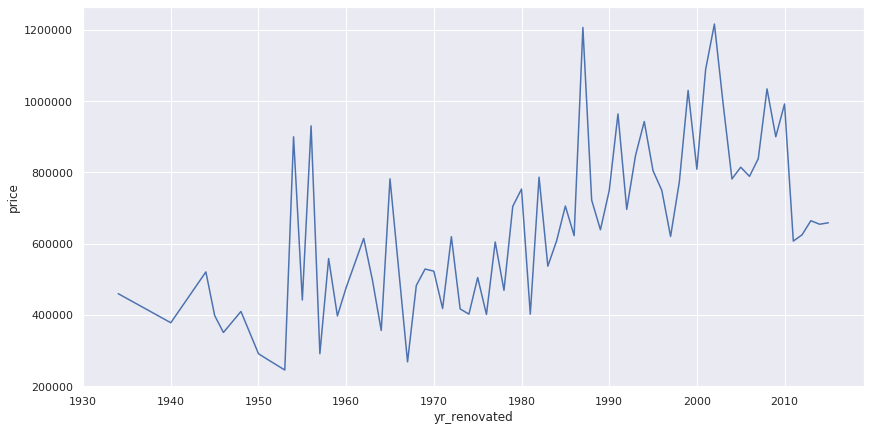

In [8]:
df3 = data.loc[data['yr_renovated']> 1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(x = 'yr_renovated', y = 'price', data=df3);

## 6. Make a table showing the average prices by year of construction and type of dorms of real estate.


In [9]:
df4 = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
df4.head()

,dormitory_type,price
0,NA,409503.846154
1,apartment,401372.681884
2,house,563092.211899
3,studio,317642.884422


## 7. Create a Dashboard with the graphs for questions 02, 03, 04 ( Dashboard: 1 Row and 2 Columns)


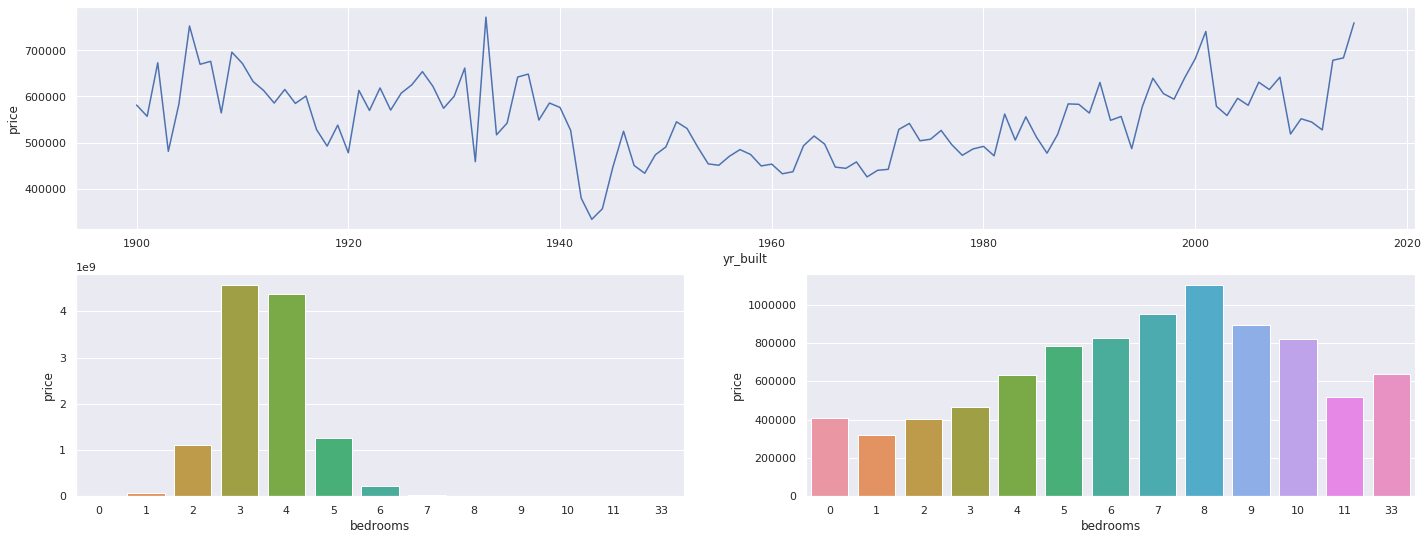

In [20]:
# Creating the grids.pack
fig = plt.figure(figsize=(24, 9))
specs = gridspec.GridSpec( ncols= 2, nrows= 2, figure=fig)

ax1 = fig.add_subplot(specs[0, : ]) #First row and two columns
ax2 = fig.add_subplot(specs[1, 0 ]) #Second row and first column
ax3 = fig.add_subplot(specs[1, 1 ]) #Second row and second column 

# Question 2
# Filtering the columns we want to plot on the chart.
df = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot(x='bedrooms', y='price', data=df, ax=ax2); # Use ";" at the end, hide default texts indifferent to plotting.

#Question 3
#plt.figure(figsize=(24, 7)) # Define the size of the graphic.
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(x='yr_built', y='price', data=df, ax=ax1);

# question 4
df = data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
#plt.bar(df2['bedrooms'], df2['price'])
sns.barplot(x='bedrooms', y='price', data=df, ax=ax3);

## 8. Create a Dashboard with the graphs of questions 02, 04 (Dashboard: 2 columns)


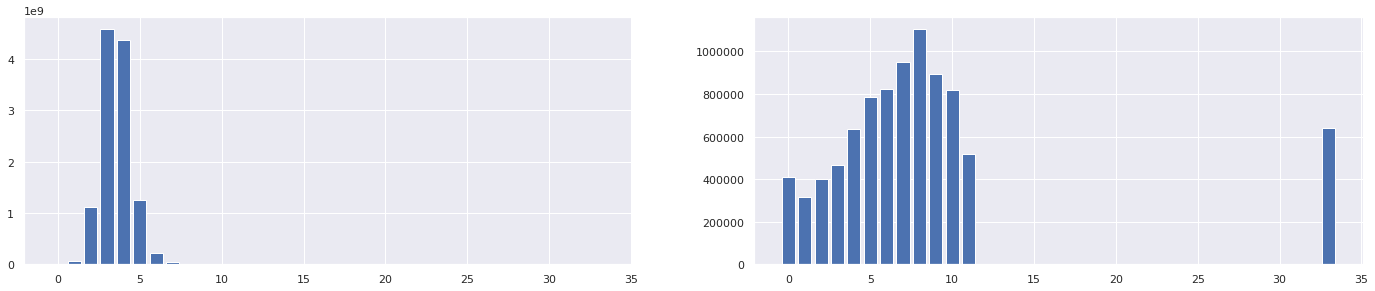

In [11]:

fig = plt.figure(figsize=(24, 10))
specs = gridspec.GridSpec( ncols= 2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) #First row and first column
ax2 = fig.add_subplot(specs[1]) #First row and second column

# Question 2
# Filtering the columns we want to plot on the chart.
df = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(df['bedrooms'], df['price']); # Use ";" at the end, hide default texts indifferent to plotting.

# question 4
df = data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
#plt.bar(df2['bedrooms'], df2['price'])
ax2.bar(df['bedrooms'], df['price']);

## 9. Create a Dashboard with the graphs of questions 03, 05 ( Dashboard: 2 Lines )


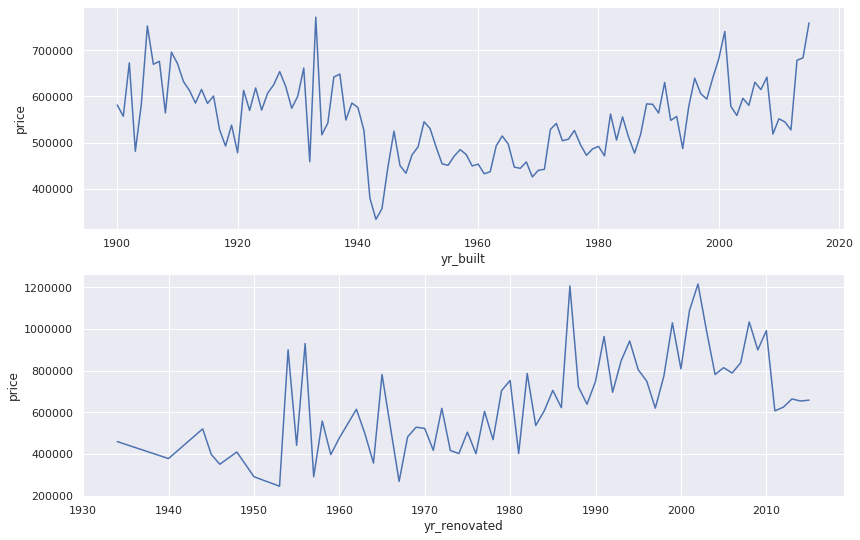

In [12]:
fig = plt.figure(figsize=(30, 9))
specs = gridspec.GridSpec(ncols= 2, nrows= 2, figure=fig)


ax1 = fig.add_subplot(specs[0, 0]) #First row and first column
ax2 = fig.add_subplot(specs[1, 0]) #First row and second column


#Question 3
#plt.figure(figsize=(24, 7)) # Define the size of the graphic.
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(x='yr_built', y='price', data=df, ax=ax1);

#Question 5
df = data.loc[data['yr_renovated']> 1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(x='yr_renovated', y='price', data=df, ax=ax2);

## 10. Make a graph with the size of the dots being equal to the size of the living room

In [19]:
houses = data[['id', 'lat', 'long', 'price', 'sqft_living']].copy()

fig = px.scatter_mapbox( houses, 
                   lat='lat',
                   lon='long',
                   size='sqft_living',
                   color_continuous_scale=px.colors.cyclical.IceFire,
                   size_max=15,
                   zoom=10 )

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=450, margin={'r':0, 'l':0, 't':0, 'b':0})
fig.show()